In [1]:
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

Using TensorFlow backend.
/home/stanislav/Documents/notebooks/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stanislav/Documents/notebooks/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stanislav/Documents/notebooks/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/h

In [2]:
base_model = MobileNet(weights='imagenet', include_top=False)

/home/stanislav/Documents/notebooks/venv/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [4]:
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
dg = ImageDataGenerator(rescale=1.0/255)

In [10]:
import os.path

In [11]:
data_part1, data_part2 = [os.path.expanduser("~/Documents/data/part{}".format(i)) for i in range(1, 3)]

In [12]:
import PIL.Image

In [13]:
model.fit_generator(dg.flow_from_directory(data_part1, class_mode='binary'))

Found 4000 images belonging to 2 classes.
Epoch 1/1
125/125 [==============================] - 122s 979ms/step - loss: 0.4668 - acc: 0.9077


In [14]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [15]:
for layer in model.layers[:71]:
    layer.trainable = False
for layer in model.layers[71:]:
    layer.trainable = True

In [16]:
from keras.optimizers import SGD

In [17]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit_generator(dg.flow_from_directory(data_part1, class_mode='binary'))

Found 4000 images belonging to 2 classes.
Epoch 1/1
125/125 [==============================] - 153s 1s/step - loss: 0.0558 - acc: 0.9790


In [19]:
model.evaluate_generator(dg.flow_from_directory(data_part2, class_mode='binary'))

Found 4000 images belonging to 2 classes.


[0.048648865750059486, 0.98025]

In [22]:
imgs = dg.flow_from_directory(os.path.expanduser("~/Documents/data/dogs-vs-cats/"), classes = ['test1'])

Found 12500 images belonging to 1 classes.


In [23]:
img = imgs.next()

In [24]:
print(img)

(array([[[[0.5921569 , 0.59607846, 0.6039216 ],
         [0.37647063, 0.3803922 , 0.38823533],
         [0.28235295, 0.28627452, 0.29411766],
         ...,
         [0.29411766, 0.30980393, 0.3137255 ],
         [0.34117648, 0.35686275, 0.36078432],
         [0.34901962, 0.3647059 , 0.36862746]],

        [[0.627451  , 0.6313726 , 0.6392157 ],
         [0.32156864, 0.3254902 , 0.33333334],
         [0.34901962, 0.3529412 , 0.36078432],
         ...,
         [0.34117648, 0.34509805, 0.3529412 ],
         [0.2627451 , 0.26666668, 0.27450982],
         [0.24705884, 0.2509804 , 0.25882354]],

        [[0.54901963, 0.5529412 , 0.56078434],
         [0.21176472, 0.21568629, 0.22352943],
         [0.34117648, 0.34509805, 0.3529412 ],
         ...,
         [0.36862746, 0.36862746, 0.37647063],
         [0.20784315, 0.20784315, 0.21568629],
         [0.20784315, 0.20784315, 0.21568629]],

        ...,

        [[0.6901961 , 0.7294118 , 0.73333335],
         [0.3803922 , 0.41960788, 0.4156863 

In [25]:
import matplotlib.pyplot as plt

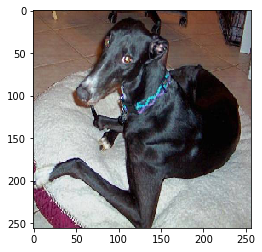

In [41]:
plt.imshow(img[0][3])

In [42]:
len(img[0])

32

dog


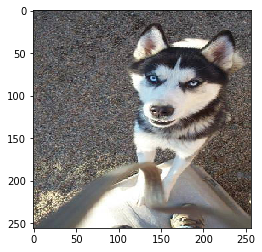

cat


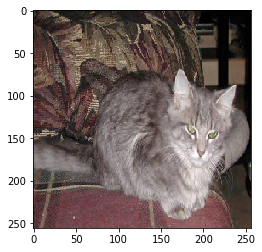

dog


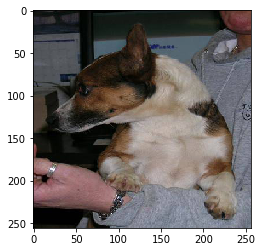

dog


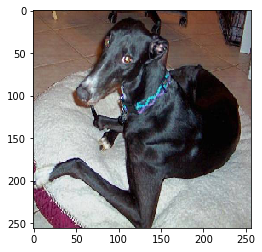

cat


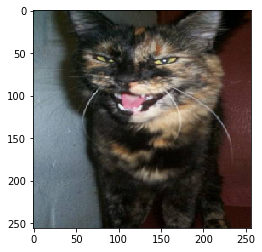

cat


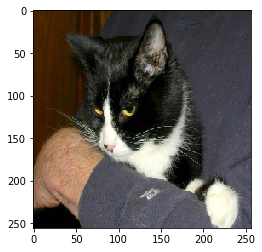

cat


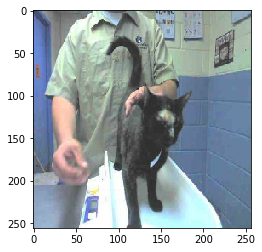

dog


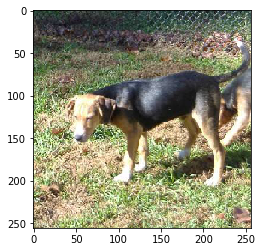

cat


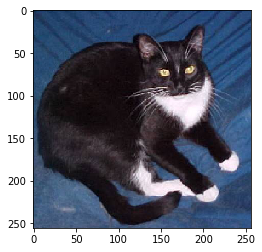

dog


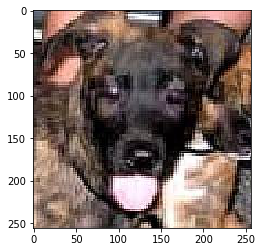

dog


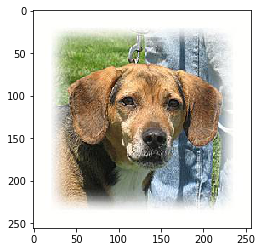

cat


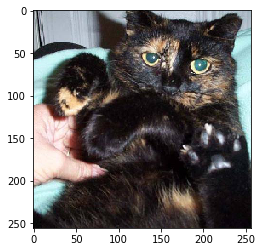

cat


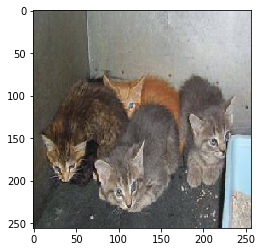

dog


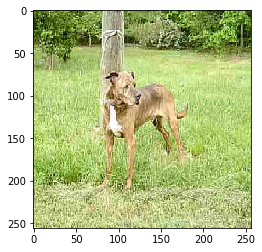

cat


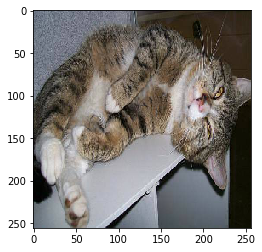

dog


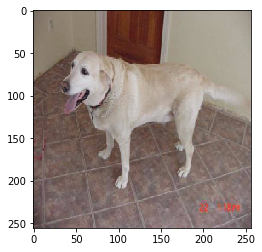

cat


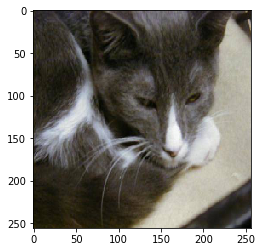

dog


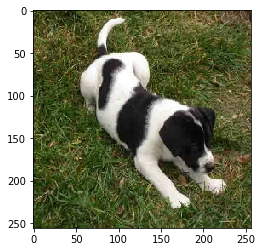

dog


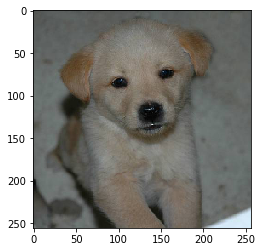

dog


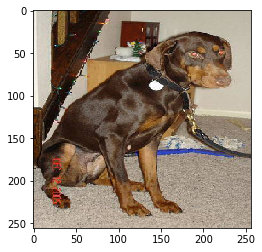

cat


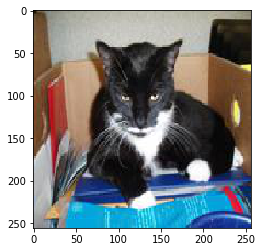

cat


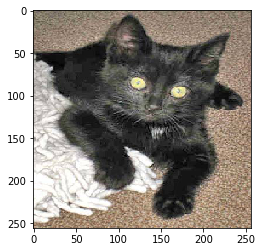

dog


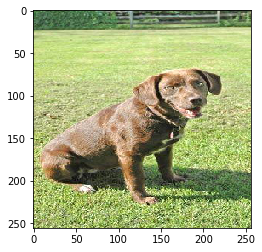

dog


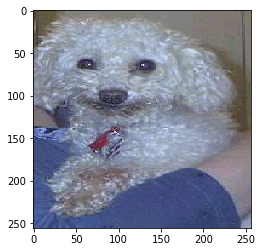

cat


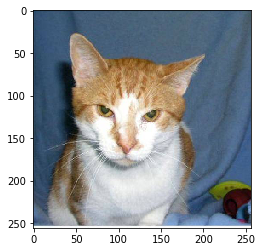

dog


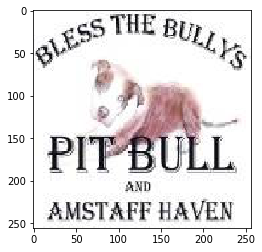

cat


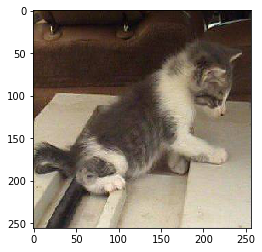

dog


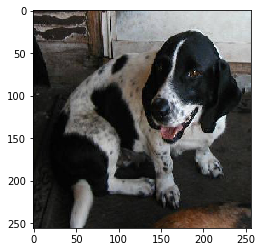

cat


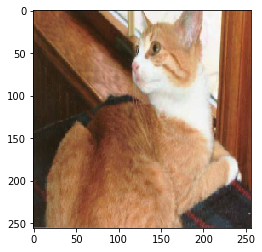

dog


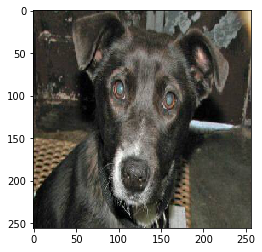

cat


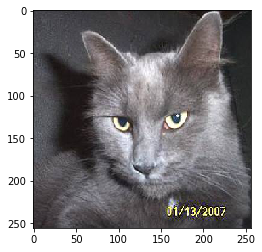

cat


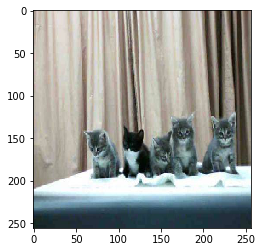

In [49]:
for im, res in zip(img[0], model.predict(img[0])):
    print('cat' if res < 0.5 else 'dog')
    plt.imshow(im)
    plt.show()